In [1]:
import pandas as pd
import numpy as np
import os 
import shutil
import scipy.stats
import scikit_posthocs as ph
import numpy as np
import scipy.stats
import numpy as np
import matplotlib_venn
from matplotlib_venn import venn3, venn2
import matplotlib.pyplot as plt
from pylab import *
import matplotlib.pyplot as plt
from pylab import *
from IPython.display import Image
import json
import skbio

In [2]:
%load_ext autoreload
%autoreload 1
%aimport metanovo_functions

In [3]:
# From the MetaNovo PRIDE project PXD03070
metanovo_uniprot    = 'data/9mm/metanovo/txt' # 9mm_metanovo_txt.zip
meta_pa       ='data/9mm/meta_pa/txt' # 9mm_meta-pa_txt.zip
sga_pa        ='data/9mm/sga_pa/txt' # 9mm_sga-pa_txt.zip
metanovo_fasta = 'data/9mm/metanovo.fasta' # 9mm_metanovo.fasta.zip

In [4]:
# MetaNovp
summary = pd.read_csv(metanovo_uniprot + '/summary.txt',sep='\t')
summary[4:].stack()

4  Raw file                                         Total
   MS                                             18400.0
   MS/MS                                          78574.0
   MS/MS Submitted                                86463.0
   MS/MS Submitted (SIL)                          70685.0
   MS/MS Submitted (ISO)                              0.0
   MS/MS Submitted (PEAK)                         15778.0
   MS/MS Identified                               38187.0
   MS/MS Identified (SIL)                         37566.0
   MS/MS Identified (ISO)                             0.0
   MS/MS Identified (PEAK)                          621.0
   MS/MS Identified [%]                             44.17
   MS/MS Identified (SIL) [%]                       53.15
   MS/MS Identified (PEAK) [%]                       3.94
   Peptide Sequences Identified                     12562
   Peaks                                        1803906.0
   Isotope Patterns                              181939.0
   Isotope Pat

In [5]:
# MetaNovp
parameters = pd.read_csv(metanovo_uniprot + '/parameters.txt',sep='\t')
parameters[45:46].values

array([['Fasta file',
        'E:\\2018\\Metaproteomics\\Thys\\tanca_2013\\metanovo\\metanovo.fasta']],
      dtype=object)

In [6]:
# Meta Pa
summary = pd.read_csv(meta_pa + '/summary.txt',sep='\t')
summary[4:].stack()

4  Raw file                                         Total
   MS                                             18400.0
   MS/MS                                          78574.0
   MS/MS Submitted                                86463.0
   MS/MS Submitted (SIL)                          70685.0
   MS/MS Submitted (ISO)                              0.0
   MS/MS Submitted (PEAK)                         15778.0
   MS/MS Identified                               19910.0
   MS/MS Identified (SIL)                         19590.0
   MS/MS Identified (ISO)                             0.0
   MS/MS Identified (PEAK)                          320.0
   MS/MS Identified [%]                             23.03
   MS/MS Identified (SIL) [%]                       27.71
   MS/MS Identified (PEAK) [%]                       2.03
   Peptide Sequences Identified                      6055
   Peaks                                        1803906.0
   Isotope Patterns                              181939.0
   Isotope Pat

In [7]:
summary[-1:]['MS/MS Identified [%]'].values[0]

23.03

In [8]:
outfolder = 'analysis/9mm/'

In [9]:
folders = { 'MetaNovo - UniProt': metanovo_uniprot,
            'Meta-PA' :meta_pa, 'SGA-PA' : sga_pa}
order = ['MetaNovo - UniProt', 'SGA-PA', 'Meta-PA']

results = {}
for name in order:
    path = folders[name]
    res = metanovo_functions.process_txt(path, name, outfolder)
    results[name] = res
    #print(res.keys())
    

Analysis: MetaNovo - UniProt
data/9mm/metanovo/txt
MetaNovo - UniProt: Total peptides:  12562
MetaNovo - UniProt: Total target peptides:  12529
MetaNovo - UniProt: Total proteins:  2562
MetaNovo - UniProt: Total target proteins:  2534
MetaNovo - UniProt: Total MS/MS Identified [%]:  44.17
Analysis: SGA-PA
data/9mm/sga_pa/txt
SGA-PA: Total peptides:  10133
SGA-PA: Total target peptides:  10109
SGA-PA: Total proteins:  2121
SGA-PA: Total target proteins:  2099
SGA-PA: Total MS/MS Identified [%]:  35.03
Analysis: Meta-PA
data/9mm/meta_pa/txt
Meta-PA: Total peptides:  6055
Meta-PA: Total target peptides:  6044
Meta-PA: Total proteins:  1098
Meta-PA: Total target proteins:  1087
Meta-PA: Total MS/MS Identified [%]:  23.03


<Figure size 432x288 with 0 Axes>

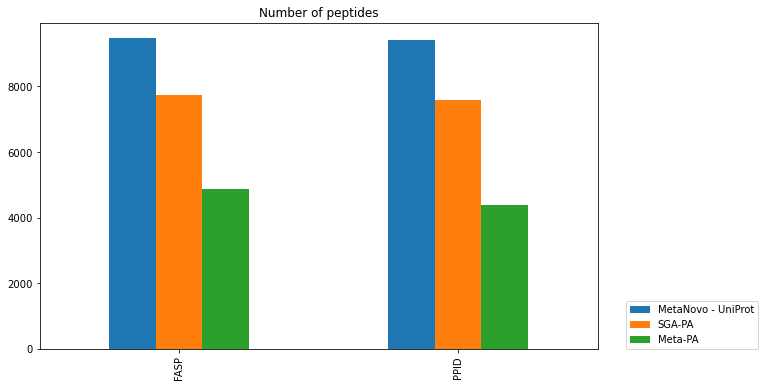

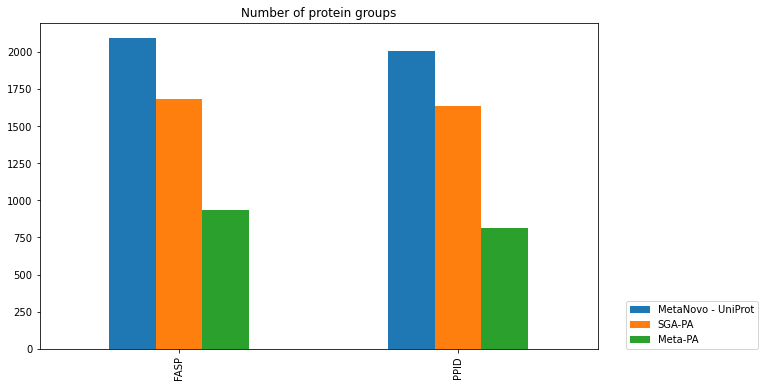

In [10]:
keys = list(results.keys())
plt.clf()
# Peptide counts per sample
count_df = pd.DataFrame()
for name in order:
    target_peptides = results[name]['TargetPeptides']
    for col in target_peptides.columns:
        if col.startswith('Experiment'):
            seqs = set(target_peptides[(target_peptides[col] > 0)]['Sequence'].tolist())
            count_df.loc[col.split()[1], name] = int(len(seqs))
ax1 = count_df.plot(kind='bar', rot=1,figsize=(10,6))
ax1.set_title("Number of peptides")
ax1.legend(bbox_to_anchor=(1.05, 0), loc='lower left', borderaxespad=0.)
fig = ax1.get_figure()
fig.savefig('analysis/figures/fig_4a.png', bbox_inches='tight', dpi=600)
plt.xticks(rotation=90)

plt.show()

# Protein counts per sample
prot_count = pd.DataFrame()
for name in order:
    target_proteins = results[name]['TargetProteins']
    for col in target_proteins.columns:
        if col.startswith('MS/MS Count '):
            ids = set(target_proteins[(target_proteins[col] > 0)]['id'].tolist())
            prot_count.loc[col.split()[-1], name] = int(len(ids))
ax2 = prot_count.plot(kind='bar', rot=1,figsize=(10,6))
ax2.set_title("Number of protein groups")
ax2.legend(bbox_to_anchor=(1.05, 0), loc='lower left', borderaxespad=0.)
fig = ax2.get_figure()
fig.savefig('analysis/figures/fig_4b.png', bbox_inches='tight', dpi=600)
plt.xticks(rotation=90)

plt.show()

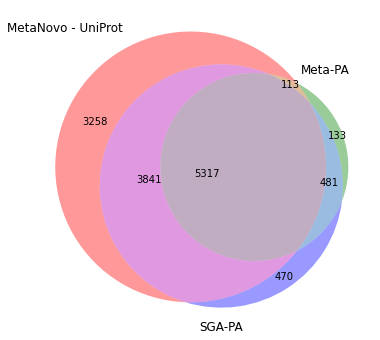

In [11]:
set1 = set(results['MetaNovo - UniProt']['TargetPeptides']['Sequence'])
set2 = set(results['Meta-PA']['TargetPeptides']['Sequence'])
set3 = set(results['SGA-PA']['TargetPeptides']['Sequence'])


#figure(num=None, figsize=(8, 6), dpi=120, facecolor='w', edgecolor='k')
fig = plt.figure(figsize=(10,6))
venn3([set1, set2, set3], ('MetaNovo - UniProt', 'Meta-PA', 'SGA-PA'))
fig.savefig('analysis/figures/fig_4c.png', dpi=600)

plt.show()

3861
3258
7969
470
857
133
193


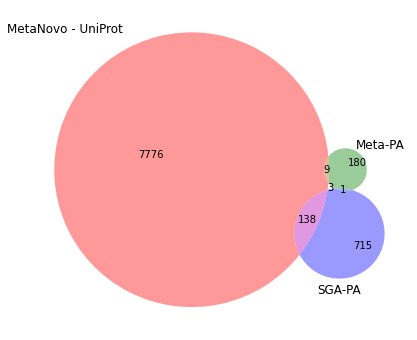

In [12]:
# exclusive peps
set1 = set(results['MetaNovo - UniProt']['TargetPeptides']['Sequence'])


set2 = set(results['Meta-PA']['TargetPeptides']['Sequence'])
set3 = set(results['SGA-PA']['TargetPeptides']['Sequence'])

set1_e = set1 - set2.union(set3)
set2_e = set2 - set3.union(set1)
set3_e = set3 - set1.union(set2)

all_e = set1_e | set2_e | set3_e

print(len(all_e))
## Get the list of scans seen in any analysis
scanids = {}
for run in results:
    sequences  = results[run]['TargetPeptides']
    sequences  = sequences[sequences['Sequence'].isin(list(all_e))]
    sequences  = sequences['Sequence']

    print(len(sequences))
    msms = pd.read_csv(results[run]['Path'] + '/msms.txt', sep='\t', engine='python')
    msms = msms[msms['Sequence'].isin(sequences)]
    msms = metanovo_functions.get_scannum(  msms )
    scanids[run] = list(set( msms['ScanID'].tolist()))
    print(len(msms))
set1 = set(scanids['MetaNovo - UniProt'])
set2 = set(scanids['Meta-PA'])
set3 = set(scanids['SGA-PA'])


fig = plt.figure(figsize=(10,6))
venn3([set1, set2, set3], ('MetaNovo - UniProt', 'Meta-PA', 'SGA-PA'))
plt.show()

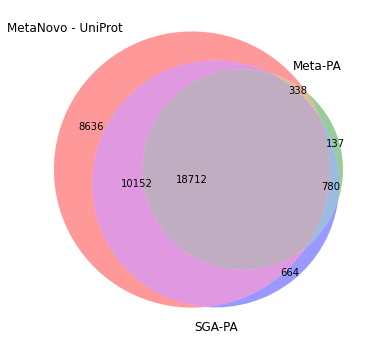

In [13]:
## Get the list of scans seen in any analysis
scanids = {}
for run in results:
    sequences  = results[run]['TargetPeptides']['Sequence']
    msms = pd.read_csv(results[run]['Path'] + '/msms.txt', sep='\t', engine='python')
    msms = msms[msms['Sequence'].isin(sequences)]
    msms = metanovo_functions.get_scannum(  msms )
    scanids[run] = list(set( msms['ScanID'].tolist()))

set1 = set(scanids['MetaNovo - UniProt'])
set2 = set(scanids['Meta-PA'])
set3 = set(scanids['SGA-PA'])

fig = plt.figure(figsize=(10,6))
venn3([set1, set2, set3], ('MetaNovo - UniProt', 'Meta-PA', 'SGA-PA'))
plt.show()

MetaNovo - UniProt exclusive:  3258
SGA-PA exclusive:  470
Meta-PA exclusive:  133


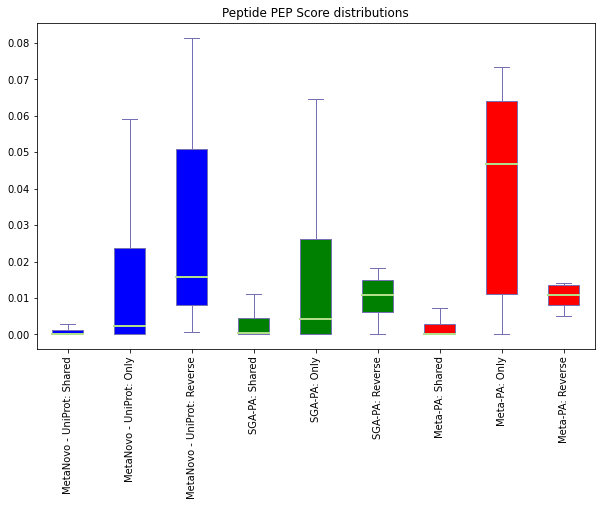

,Count,PEP Score - median,PEP Score - std. dev.
MetaNovo - UniProt: Shared,5317,0.000030,0.008871
MetaNovo - UniProt: Only,3258,0.002341,0.023638
MetaNovo - UniProt: Reverse,33,0.015812,0.028426
SGA-PA: Shared,5317,0.000272,0.012831
SGA-PA: Only,470,0.004267,0.050458
SGA-PA: Reverse,24,0.010926,0.020231
Meta-PA: Shared,5317,0.000022,0.013284
Meta-PA: Only,133,0.046675,0.026671
Meta-PA: Reverse,11,0.010709,0.005605


In [14]:
##################
## Peptide Sets ##
##################
all_peps = set()
keys = list(results.keys())
names = []
pep_scores = []
for key in order:
    peps = set(results[key]['TargetPeptides']['Sequence'])
    all_peps.update(peps)
# Get common peptides to all runs
intersect = all_peps.copy()
for key in order:
    peps = set(results[key]['TargetPeptides']['Sequence'])
    intersect = intersect & peps
# Get esclusive peptides for all runs
for key in order:
    peps = results[key]['TargetPeptides']
    rpeps = results[key]['ReversePeptides']
    exclusive = set(peps['Sequence'].tolist()).copy()
    for qkey in keys:
        if not qkey == key:
            qpeps = results[qkey]['TargetPeptides']
            qpeps = set(qpeps['Sequence'].tolist())
            exclusive -= qpeps
    print('{} exclusive: '.format(key), len(exclusive))
    common_pep = peps[peps['Sequence'].isin(intersect)]['PEP'].tolist()
    pep_scores.append(common_pep)
    names.append(key + ': Shared')
    exclusive_pep = peps[peps['Sequence'].isin(exclusive)]['PEP'].tolist()
    pep_scores.append(exclusive_pep)
    names.append(key + ': Only')
    reverse_pep = rpeps['PEP'].tolist()
    pep_scores.append(reverse_pep)
    names.append(key + ': Reverse')

#############
## BOXPLOT ##
#############

colours = ['b','g','r','c','m','y','k']
fig = plt.figure(figsize=(10,6))


ax = fig.add_subplot(111)
# Create the boxplot
bp = ax.boxplot(np.array(pep_scores, dtype=object), patch_artist=True, showfliers=False)

## change outline color, fill color and linewidth of the boxes
count = 0
col_ind=0
for box in bp['boxes']:
    count += 1
    # change outline color
    box.set( color='#7570b3', linewidth=1)
    # change fill color
    box.set( facecolor = colours[col_ind] )
    ## change color and linewidth of the whiskers
    if count % 3 == 0:
        col_ind +=1
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=1)
## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=1)
## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)
    #median.set(linewidth=2)
## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='.', color='#e7298a', alpha=0.5)
## Custom x-axis labels
ax.set_xticklabels(names, rotation=90)
#ax.set_yticklabels('Posterior Error Probability (PEP)') 
ax.set_title('Peptide PEP Score distributions')
## Remove top axes and right axes ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
#plt.xticks(rotation=45)
fig.savefig('analysis/figures/fig_4d.png', bbox_inches='tight', dpi=600)
plt.show()
fig.clf()

pep_df = pd.DataFrame()
for val in range(len(names)):
    pep_df.loc[names[val], 'Count'] = len(pep_scores[val])
    pep_df.loc[names[val], 'PEP Score - median'] = np.median(pep_scores[val])
    pep_df.loc[names[val], 'PEP Score - std. dev.'] = np.std(pep_scores[val])

pep_df['Count'] = pep_df['Count'].astype(int)
pep_df

# UniPept

In [15]:
print('All peptides found: ', len(all_peps))
w=open( outfolder + '/combined_peptide_set.txt','w')
w.write('\n'.join(all_peps))
w.close()
cmd = 'cat analysis/9mm/combined_peptide_set.txt | prot2pept | peptfilter | sort -u | unipept pept2lca -e -a > analysis/9mm/combined_pept2lca.csv || rm analysis/9mm/combined_pept2lca.csv'
# run this in terminal
print('Please run this command in terminal in the root directory of the repo: \n' + cmd)

All peptides found:  13613
Please run this command in terminal in the root directory of the repo: 
cat analysis/9mm/combined_peptide_set.txt | prot2pept | peptfilter | sort -u | unipept pept2lca -e -a > analysis/9mm/combined_pept2lca.csv || rm analysis/9mm/combined_pept2lca.csv


In [16]:
species_allowed = ['Enterococcus faecalis', 'Escherichia coli', 'Pasteurella multocida', 'Brevibacillus laterosporus', 'Lactobacillus acidophilus', 'Lactobacillus casei', 'Pediococcus pentosaceus', 'Rhodotorula glutinis', 'Saccharomyces cerevisiae']
genus_allowed = ['Enterococcus', 'Escherichia', 'Pasteurella', 'Brevibacillus', 'Lactobacillus', 'Pediococcus', 'Rhodotorula', 'Saccharomyces']
family_allowed = ['Lactobacillaceae', 'Paenibacillaceae','Pasteurellaceae', 'Enterobacteriaceae','Sporidiobolaceae','Saccharomycetaceae','Enterococcaceae']

In [17]:
!cp analysis/9mm/combined_pept2lca.csv analysis/supplementary/S11_table.csv 
taxa = pd.read_csv('analysis/9mm/combined_pept2lca.csv', low_memory=False) # Please use Supplemental Table S11 (S11_table.csv) to use the ouput of UniPept at the time of writing

taxa = taxa.drop_duplicates()

template = pd.DataFrame(pd.Series(list(all_peps)))
template.rename(columns={0:'peptide'}, inplace=True)
smapping = pd.merge(template, taxa, how='inner')

# fig 4

In [18]:
metanovo_functions.concat_4way_image('analysis/figures/fig_4a.png',
                                     'analysis/figures/fig_4b.png',
                                     'analysis/figures/fig_4c.png',
                                     'analysis/figures/fig_4d.png',
                                     'analysis/figures/fig_4_combined.png' )

# Taxon identification rates - strict

<Figure size 432x288 with 0 Axes>

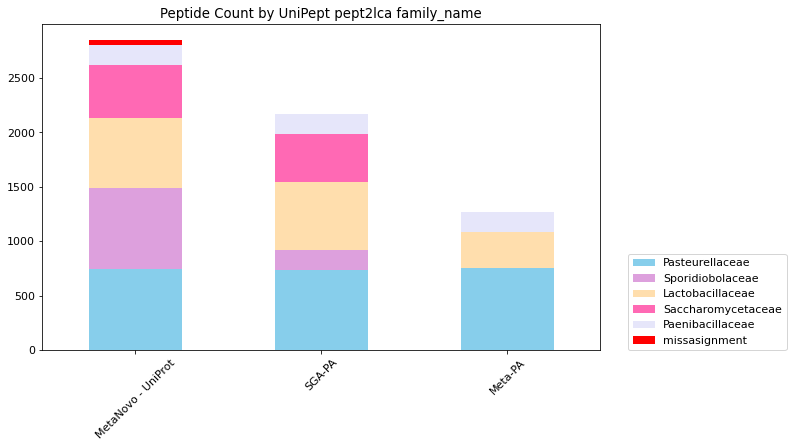

,MetaNovo - UniProt,SGA-PA,Meta-PA
family_name,,,
Pasteurellaceae,26.086957,33.979686,59.276730
Sporidiobolaceae,26.086957,8.310249,0.000000
Lactobacillaceae,22.475456,28.855032,26.179245
Saccharomycetaceae,17.180926,20.544783,0.000000
Paenibacillaceae,6.346424,8.310249,14.544025
missasignment,1.823282,0.000000,0.000000


In [19]:
order = ['MetaNovo - UniProt', 'SGA-PA', 'Meta-PA']
count_df = metanovo_functions.plot_taxa(results, 'family_name', smapping, order, 0.5, truth_list=family_allowed, level='peptide')
count_df/count_df.sum() * 100

<Figure size 432x288 with 0 Axes>

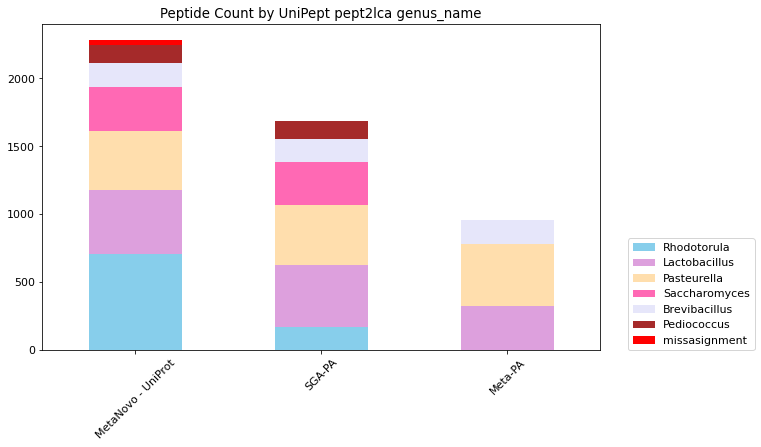

In [20]:
order = ['MetaNovo - UniProt', 'SGA-PA', 'Meta-PA']
count_df = metanovo_functions.plot_taxa(results, 'genus_name', smapping, order, 0.5, truth_list=genus_allowed, level = 'peptide')


<Figure size 432x288 with 0 Axes>

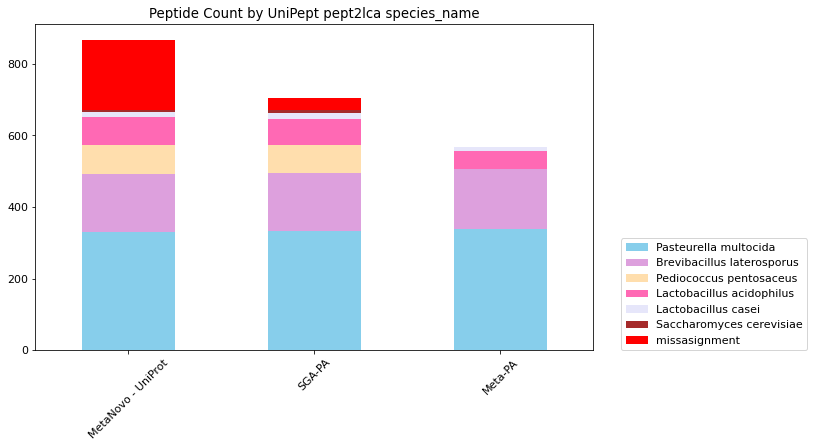

,MetaNovo - UniProt,SGA-PA,Meta-PA
species_name,,,
Pasteurella multocida,329,333,339
missasignment,196,33,0
Brevibacillus laterosporus,162,162,167
Pediococcus pentosaceus,81,77,0
Lactobacillus acidophilus,79,73,51
Lactobacillus casei,15,18,12
Saccharomyces cerevisiae,6,8,0
Total,868,704,569


In [21]:
order = ['MetaNovo - UniProt','SGA-PA', 'Meta-PA']
count_df = metanovo_functions.plot_taxa(results, 'species_name', smapping, order, 0.5, truth_list=species_allowed, level='peptide', fname='analysis/figures/fig_5a.png')
count_df.loc['Total'] = count_df.sum()
count_df 

<Figure size 432x288 with 0 Axes>

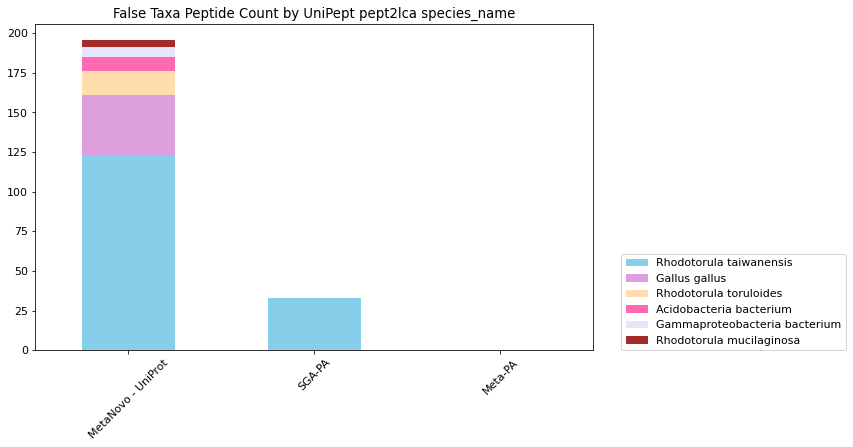

,MetaNovo - UniProt,SGA-PA,Meta-PA
species_name,,,
Rhodotorula taiwanensis,123,33,0
Gallus gallus,38,0,0
Rhodotorula toruloides,15,0,0
Acidobacteria bacterium,9,0,0
Gammaproteobacteria bacterium,6,0,0
Rhodotorula mucilaginosa,5,0,0
Total,196,33,0


In [22]:
order = ['MetaNovo - UniProt','SGA-PA', 'Meta-PA']
count_df = metanovo_functions.plot_taxa(results, 'species_name', smapping, order, 0.5, truth_list=species_allowed, level='peptide',truth_exclude=True, fname='analysis/figures/fig_5b.png')
count_df.loc['Total'] = count_df.sum()
new_count_df = count_df.loc[["Rhodotorula taiwanensis", "Rhodotorula toruloides","Rhodotorula mucilaginosa"]]
new_count_df.loc['Total'] = new_count_df.sum()
count_df

In [23]:
smapping[smapping['species_name']=='Gammaproteobacteria bacterium']

,peptide,taxon_id,taxon_name,taxon_rank,superkingdom_id,superkingdom_name,kingdom_id,kingdom_name,subkingdom_id,subkingdom_name,...,species_subgroup_id,species_subgroup_name,species_id,species_name,subspecies_id,subspecies_name,varietas_id,varietas_name,forma_id,forma_name
302,VIGVGGGGGNAVER,1913989,Gammaproteobacteria bacterium,species,2.0,Bacteria,NaN,NaN,NaN,NaN,...,NaN,NaN,1913989.0,Gammaproteobacteria bacterium,NaN,NaN,NaN,NaN,NaN,NaN
969,EVLTPDSSR,1913989,Gammaproteobacteria bacterium,species,2.0,Bacteria,NaN,NaN,NaN,NaN,...,NaN,NaN,1913989.0,Gammaproteobacteria bacterium,NaN,NaN,NaN,NaN,NaN,NaN
1832,NHVITEAR,1913989,Gammaproteobacteria bacterium,species,2.0,Bacteria,NaN,NaN,NaN,NaN,...,NaN,NaN,1913989.0,Gammaproteobacteria bacterium,NaN,NaN,NaN,NaN,NaN,NaN
2408,STADDNQTAVTIHVLQGER,1913989,Gammaproteobacteria bacterium,species,2.0,Bacteria,NaN,NaN,NaN,NaN,...,NaN,NaN,1913989.0,Gammaproteobacteria bacterium,NaN,NaN,NaN,NaN,NaN,NaN
4102,AAALLAAAEAHTR,1913989,Gammaproteobacteria bacterium,species,2.0,Bacteria,NaN,NaN,NaN,NaN,...,NaN,NaN,1913989.0,Gammaproteobacteria bacterium,NaN,NaN,NaN,NaN,NaN,NaN
5314,EHGLLVPAR,1913989,Gammaproteobacteria bacterium,species,2.0,Bacteria,NaN,NaN,NaN,NaN,...,NaN,NaN,1913989.0,Gammaproteobacteria bacterium,NaN,NaN,NaN,NaN,NaN,NaN


# Taxon identifications - inclusion of known taxa

<Figure size 432x288 with 0 Axes>

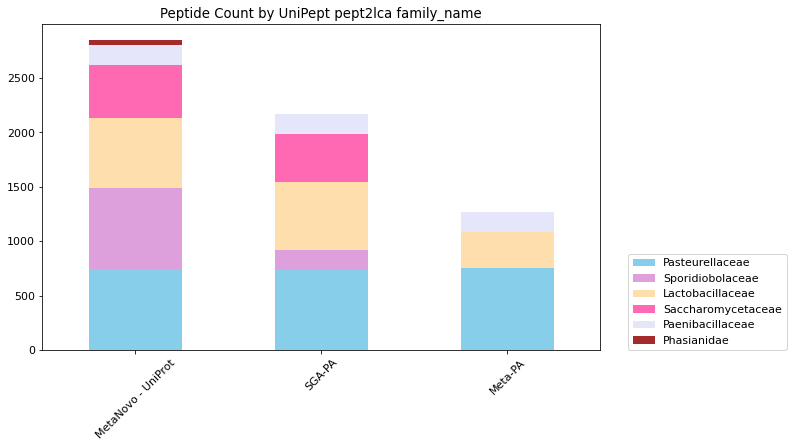

,MetaNovo - UniProt,SGA-PA,Meta-PA
family_name,,,
Pasteurellaceae,744,736,754
Sporidiobolaceae,744,180,0
Lactobacillaceae,641,625,333
Saccharomycetaceae,490,445,0
Paenibacillaceae,181,180,185
Phasianidae,52,0,0


In [24]:
order = ['MetaNovo - UniProt', 'SGA-PA', 'Meta-PA']
corrected_family_allowed = family_allowed + ['Phasianidae']
count_df = metanovo_functions.plot_taxa(results, 'family_name', smapping, order, 0.5, truth_list=corrected_family_allowed , level='peptide')
count_df

<Figure size 432x288 with 0 Axes>

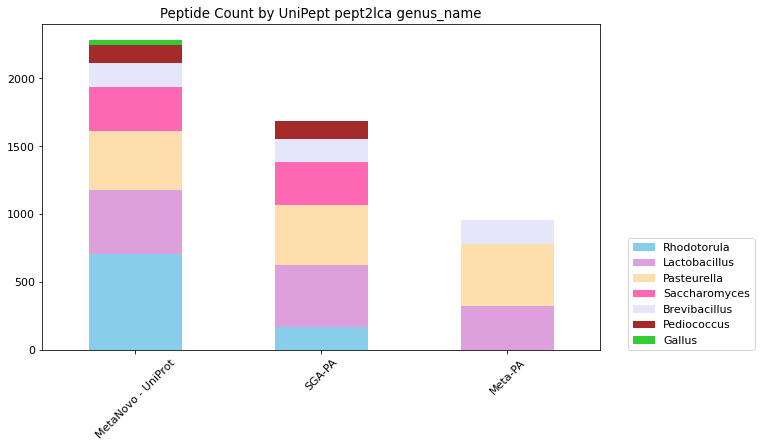

,MetaNovo - UniProt,SGA-PA,Meta-PA
genus_name,,,
Rhodotorula,709,170,0
Lactobacillus,466,456,326
Pasteurella,441,445,454
Saccharomyces,324,314,0
Brevibacillus,173,172,177
Pediococcus,135,132,0
Gallus,38,0,0


In [25]:
order = ['MetaNovo - UniProt', 'SGA-PA', 'Meta-PA']
corrected_genus_allowed = genus_allowed + ['Gallus']
count_df = metanovo_functions.plot_taxa(results, 'genus_name', smapping, order, 0.5, truth_list=corrected_genus_allowed , level='peptide')
count_df

<Figure size 432x288 with 0 Axes>

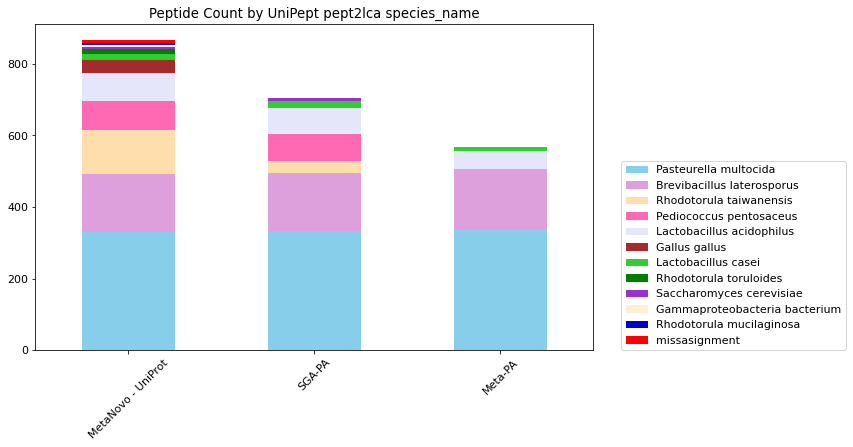

<Figure size 432x288 with 0 Axes>

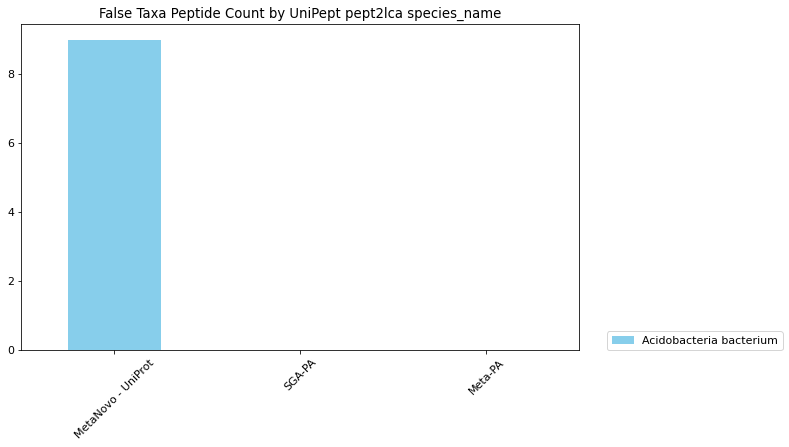

,MetaNovo - UniProt,SGA-PA,Meta-PA
species_name,,,
Acidobacteria bacterium,9,0,0
Total,9,0,0


In [26]:
order = ['MetaNovo - UniProt','SGA-PA', 'Meta-PA']
# Gammaproteobacteria bacterium	 - Pasteurella
corrected_species_allowed = species_allowed + ['Rhodotorula taiwanensis', 'Rhodotorula toruloides', 'Rhodotorula mucilaginosa','Gallus gallus', 'Gammaproteobacteria bacterium']
count_df = metanovo_functions.plot_taxa(results, 'species_name', smapping, order, 0.5, truth_list=corrected_species_allowed, level='peptide', fname='analysis/figures/fig_5c.png')
count_df.loc['Total'] = count_df.sum()
count_df = metanovo_functions.plot_taxa(results, 'species_name', smapping, order, 0.5, truth_list=corrected_species_allowed, level='peptide', truth_exclude=True, fname='analysis/figures/fig_5d.png')
count_df.loc['Total'] = count_df.sum()
count_df

# Gallus Gallus peptides

In [27]:
gallus_peptides = smapping[smapping['species_name'] =='Gallus gallus'][['peptide']]
gallus_peptides.to_csv(outfolder + '/gallus_peptides.csv', index=False)

In [28]:
fasta_list = []
import Bio
from Bio.SeqRecord import SeqRecord
count = 1
from Bio.Seq import Seq
for p in gallus_peptides['peptide'].tolist():
    r = SeqRecord(seq=Seq(p), id='record_{}'.format(str(count)))
    fasta_list.append(r)
    count += 1
Bio.SeqIO.write(fasta_list, '{}/gallus.fasta'.format(outfolder), 'fasta')

38

In [29]:
# obtain this file from uploaded supplementary data, this is the output of NCBI blastp
with open('analysis/supplementary/S12_data.json') as f:
    gallus_blast_results = json.loads(f.read())

In [30]:
res_list = []
for res in gallus_blast_results['BlastOutput2']:
    query = res['report']['results']['search']['query_title']
    query_len = res['report']['results']['search']['query_len']
    for hit in res['report']['results']['search']['hits']:
        orgs = []
        
        for desc in hit['description']:
            #print(desc)
            org = desc['sciname']
            taxid = desc['taxid']
            title= desc['title']
            accession= desc['accession']
            orgs.append((org, accession, title, taxid))
            
        for org in orgs:
            for hsp in hit['hsps']:
                #print(hsp)
                
                bit_score = hsp['bit_score']
                evalue = hsp['evalue']
                qseq = hsp['qseq']
                hseq = hsp['hseq']
                midline= hsp['midline']
                pct_identity = (hsp['identity'] / query_len) * 100
                res_list.append([ query, org[0], org[1],org[2], org[3], pct_identity, qseq, hseq, midline , bit_score, evalue] )
gallus_df = pd.DataFrame(res_list)
gallus_df.columns = ['record', 'sciname', 'accession', 'title','taxid', 'identity_pct','qseq','hseq','midline','bit_score','evalue']

gallus_df.to_csv('analysis/supplementary/S13_table.csv')
gallus_df.head()

,record,sciname,accession,title,taxid,identity_pct,qseq,hseq,midline,bit_score,evalue
0,record_1,Gallus gallus,NP_001038098,apolipoprotein B precursor [Gallus gallus],9031,100.000000,MSSAFQVDFSDYSK,MSSAFQVDFSDYSK,MSSAFQVDFSDYSK,48.5687,0.000033
1,record_1,Gallus gallus,ABF70173,apolipoprotein B [Gallus gallus],9031,100.000000,MSSAFQVDFSDYSK,MSSAFQVDFSDYSK,MSSAFQVDFSDYSK,48.5687,0.000033
2,record_1,Penelope pileata,NXC43088,APOB protein [Penelope pileata],1118817,100.000000,MSSAFQVDFSDYSK,MSSAFQVDFSDYSK,MSSAFQVDFSDYSK,48.5687,0.000033
3,record_1,Meleagris gallopavo,XP_010706280,apolipoprotein B-100 [Meleagris gallopavo],9103,92.857143,MSSAFQVDFSDYSK,MSSGFQVDFSDYSK,MSS FQVDFSDYSK,45.1755,0.000525
4,record_1,Coturnix japonica,XP_015715031,LOW QUALITY PROTEIN: apolipoprotein B-100 [Cot...,93934,92.857143,MSSAFQVDFSDYSK,MSSGFQVDFSDYSK,MSS FQVDFSDYSK,45.1755,0.000525


In [31]:
passing = []
for name , group in gallus_df.groupby('record'):
    #print(name)
    sub = group[group['identity_pct'] >=100]
    names = sub['sciname']
    if list(set(names)) == ['Gallus gallus']:
        passing.append(name)
print(len(passing))

20


In [32]:
metanovo_peptides = results['MetaNovo - UniProt']['TargetPeptides']
metanovo_proteins = results['MetaNovo - UniProt']['TargetProteins']
metanovo_peptides_gallus = metanovo_peptides[metanovo_peptides['Sequence'].isin(gallus_peptides['peptide'].tolist())]

In [33]:
from Bio import SeqIO


fasta_dict = SeqIO.to_dict(list(SeqIO.parse(metanovo_fasta,'fasta')))

gallus_protein_groups = metanovo_peptides_gallus['Protein group IDs'].tolist()
proteins_list = []
for i in gallus_protein_groups:
    ids = i.split(';')
    proteins_list += ids
print(proteins_list)
print(len(set(proteins_list)))
gallus_proteins = metanovo_proteins[metanovo_proteins['id'].apply(str).isin(proteins_list)]
gallus_proteins_fasta_headers = gallus_proteins['Fasta headers']

chicken_proteins = []

seen = []
for p in gallus_proteins_fasta_headers:
    for pp in p.split(';')[:1]: # leading proteins
        ID = pp.split()[0].split('>')[1]
        if ID in seen:
            continue
        seen.append(ID)
        rec = fasta_dict[ID]
        chicken_proteins.append(rec)
SeqIO.write(chicken_proteins, '{}/chicken_proteins.fasta'.format(outfolder), 'fasta')

['2175', '49', '1128', '49', '48', '49', '49', '49', '49', '2412', '49', '1126', '49', '49', '2175', '49', '49', '60', '592', '49', '2175', '49', '2175', '49', '60', '592', '49', '49', '2175', '49', '60', '592', '49', '1126', '2412', '49', '60', '592', '2175', '1128', '49', '49']
8


8

In [34]:
with open('analysis/supplementary/S14_data.json') as f:
    gallus_blast_protein = json.loads(f.read())

res_p_list = []
for res in gallus_blast_protein['BlastOutput2']:
    query = res['report']['results']['search']['query_title']
    query_len = res['report']['results']['search']['query_len']
    for hit in res['report']['results']['search']['hits']:
    
        
        for desc in hit['description']:
            org = desc['sciname']
            taxid = desc['taxid']
            title = desc['title']
            accession = desc['accession']
            for hsp in hit['hsps']:
                
                pct_identity = (hsp['identity'] / query_len) * 100
                res_p_list.append([ query, org, taxid, pct_identity, title, accession])
gallus_p_df = pd.DataFrame(res_p_list)
gallus_p_df.columns = ['record', 'sciname','taxid', 'identity_pct', 'title', 'accession']
gallus_p_df.to_csv('analysis/supplementary/S15_table.csv')
gallus_p_df.head()


,record,sciname,taxid,identity_pct,title,accession
0,sp|P02659|APOV1_CHICK Apovitellenin-1 OS=Gallu...,Gallus gallus,9031,100.0,apovitellenin-1 precursor [Gallus gallus],NP_990814
1,sp|P02659|APOV1_CHICK Apovitellenin-1 OS=Gallu...,Gallus gallus,9031,100.0,apovitellenin-1 isoform X1 [Gallus gallus],XP_015151420
2,sp|P02659|APOV1_CHICK Apovitellenin-1 OS=Gallu...,Gallus gallus,9031,100.0,RecName: Full=Apovitellenin-1; AltName: Full=A...,P02659
3,sp|P02659|APOV1_CHICK Apovitellenin-1 OS=Gallu...,Gallus gallus,9031,100.0,very low density lipoprotein II precursor [Gal...,AAA48596
4,sp|P02659|APOV1_CHICK Apovitellenin-1 OS=Gallu...,Gallus gallus,9031,100.0,unnamed protein product [Gallus gallus],CAA23727


In [35]:
cnt = 0
for name , group in gallus_p_df.groupby('record'):
    #print(name)
    cnt += 1
    sub = group[group['identity_pct'] >=90]
    names = sub['sciname']
    #print(list(set(names)))
    if list(set(names)) == ['Gallus gallus']:
        print(name)
        #print(list(set(sub['title'])))
print(cnt)
# all yolk proteins

sp|P02659|APOV1_CHICK Apovitellenin-1 OS=Gallus gallus OX=9031 PE=1 SV=1
sp|P02845|VIT2_CHICK Vitellogenin-2 OS=Gallus gallus OX=9031 GN=VTG2 PE=1 SV=1
sp|P87498|VIT1_CHICK Vitellogenin-1 OS=Gallus gallus OX=9031 GN=VTG1 PE=1 SV=1
tr|A0A1D5NUW2|A0A1D5NUW2_CHICK Vitellogenin-1 OS=Gallus gallus OX=9031 GN=VTG1 PE=4 SV=1
tr|A0A3Q2U347|A0A3Q2U347_CHICK Vitellogenin-3 OS=Gallus gallus OX=9031 GN=VTG3 PE=4 SV=1
8


# Relative Proportion MSE 

<Figure size 432x288 with 0 Axes>

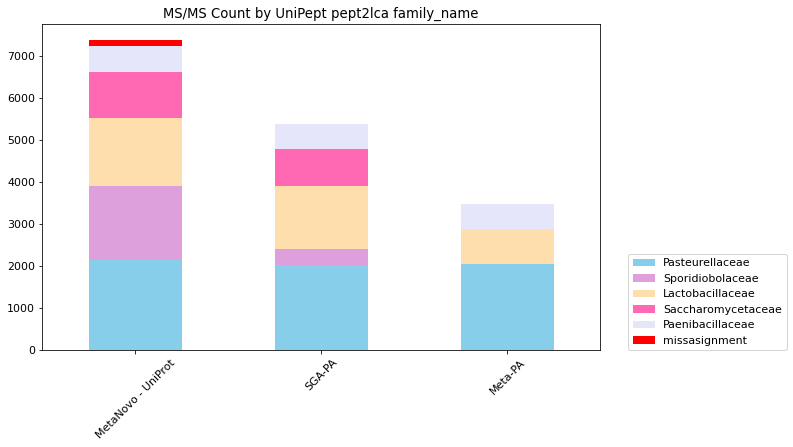

                    MetaNovo - UniProt  SGA-PA  Meta-PA
family_name                                            
Pasteurellaceae                   2145    2029     2048
Sporidiobolaceae                  1751     383        0
Lactobacillaceae                  1619    1487      843
Saccharomycetaceae                1091     888        0
Paenibacillaceae                   624     587      590
missasignment                      157       0        0
['Lactobacillaceae', 'Paenibacillaceae', 'Pasteurellaceae', 'Enterobacteriaceae', 'Sporidiobolaceae', 'Saccharomycetaceae', 'Enterococcaceae']
                    MetaNovo - UniProt     SGA-PA    Meta-PA  expected
family_name                                                           
Lactobacillaceae             21.916881  27.670264  24.217179      25.0
Paenibacillaceae              8.447272  10.922962  16.949153      12.5
Pasteurellaceae              29.037498  37.755862  58.833668      12.5
Enterobacteriaceae            0.000000   0.000000   0.

In [36]:
mse_genus_df = count_df.copy()
order = ['MetaNovo - UniProt', 'SGA-PA', 'Meta-PA']
family_results = {}
count_df = metanovo_functions.plot_taxa(results, 'family_name', smapping, order, 0.5, truth_list=family_allowed, level = 'msms')
print(count_df)
mse_genus_df = count_df.copy()



mse_genus_df.loc["Enterococcaceae",'expected'] = 1
mse_genus_df.loc["Enterobacteriaceae",'expected'] = 1
mse_genus_df['expected'] = 1
mse_genus_df.loc["Lactobacillaceae",'expected'] = 2
mse_genus_df.loc['missasignment','expected'] =0
mse_genus_df =mse_genus_df.replace(np.nan,0)
print(family_allowed)

r =mse_genus_df.loc[family_allowed]/mse_genus_df.sum() * 100

print(r)

from sklearn.metrics import mean_squared_error
expected = r['expected']
cols = ['MetaNovo - UniProt','SGA-PA','Meta-PA']
for col in cols:
    pred = r[col]
    res = mean_squared_error(expected, pred)
    family_results[col] = res
    print(col, res)

<Figure size 432x288 with 0 Axes>

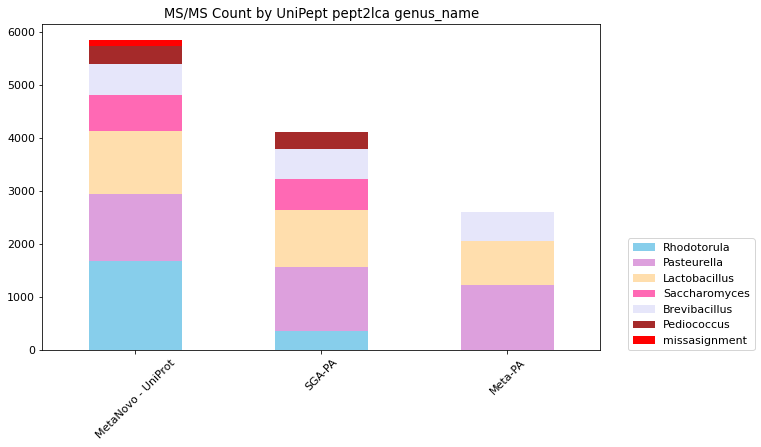

               MetaNovo - UniProt  SGA-PA  Meta-PA
genus_name                                        
Rhodotorula                  1677     361        0
Pasteurella                  1263    1212     1221
Lactobacillus                1186    1066      828
Saccharomyces                 689     596        0
Brevibacillus                 587     552      555
Pediococcus                   333     331        0
missasignment                 120       0        0
               MetaNovo - UniProt     SGA-PA    Meta-PA   expected
genus_name                                                        
Enterococcus             0.000000   0.000000   0.000000  11.111111
Escherichia              0.000000   0.000000   0.000000  11.111111
Pasteurella             21.571307  29.431763  46.889401  11.111111
Brevibacillus           10.025619  13.404565  21.313364  11.111111
Lactobacillus           20.256191  25.886353  31.797235  22.222222
Pediococcus              5.687447   8.037882   0.000000  11.111111
Rhodo

In [37]:
mse_genus_df = count_df.copy()
genus_results = {}
order = ['MetaNovo - UniProt', 'SGA-PA', 'Meta-PA']
genus_mse_allowed= ['Enterococcus', 'Escherichia', 'Pasteurella', 'Brevibacillus', 'Lactobacillus', 'Pediococcus', 'Rhodotorula', 'Saccharomyces']
count_df = metanovo_functions.plot_taxa(results, 'genus_name', smapping, order, 0.5, truth_list=genus_mse_allowed , level = 'msms')
print(count_df)
mse_genus_df = count_df.copy()

mse_genus_df['expected'] = 1
mse_genus_df.loc["Enterococcus",'expected'] = 1
mse_genus_df.loc["Escherichia",'expected'] = 1
mse_genus_df.loc["Lactobacillus",'expected'] = 2
mse_genus_df.loc['missasignment','expected'] =0
mse_genus_df =mse_genus_df.replace(np.nan,0)
r = mse_genus_df.loc[genus_allowed] / mse_genus_df.sum() * 100

print(r)

from sklearn.metrics import mean_squared_error
expected = r['expected']
cols = ['MetaNovo - UniProt','SGA-PA','Meta-PA']

for col in cols:
    pred = r[col]
    res = mean_squared_error(expected, pred)
    genus_results[col] =res
    print(col,res)

<Figure size 432x288 with 0 Axes>

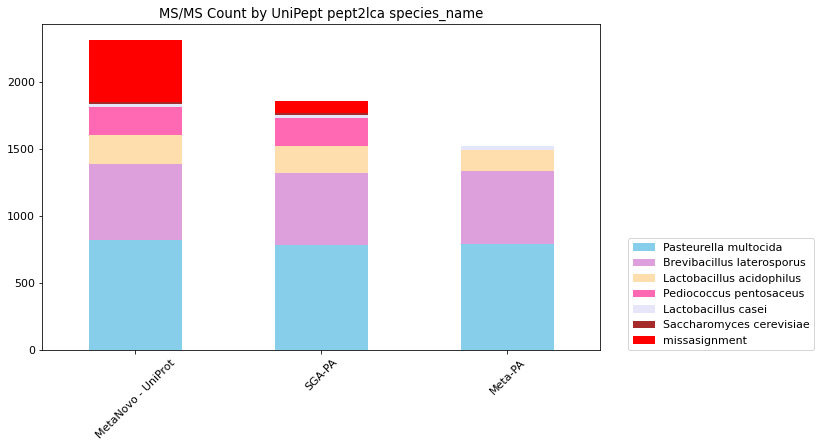

                            MetaNovo - UniProt  SGA-PA  Meta-PA
species_name                                                   
Pasteurella multocida                      820     787      795
Brevibacillus laterosporus                 570     536      539
missasignment                              463      85        0
Lactobacillus acidophilus                  212     196      158
Pediococcus pentosaceus                    209     209        0
Lactobacillus casei                         28      26       27
Saccharomyces cerevisiae                    14      15        0
                            MetaNovo - UniProt     SGA-PA    Meta-PA  \
species_name                                                           
Enterococcus faecalis                 0.000000   0.000000   0.000000   
Escherichia coli                      0.000000   0.000000   0.000000   
Pasteurella multocida                35.405872  42.448759  52.337064   
Brevibacillus laterosporus           24.611399  28.910464  35.48

In [38]:
order = ['MetaNovo - UniProt','SGA-PA', 'Meta-PA']
species_mse_allowed = ['Enterococcus faecalis', 'Escherichia coli', 'Pasteurella multocida', 'Brevibacillus laterosporus', 'Lactobacillus acidophilus', 'Lactobacillus casei', 'Pediococcus pentosaceus', 'Rhodotorula glutinis', 'Saccharomyces cerevisiae']
species_results = {}
count_df = metanovo_functions.plot_taxa(results, 'species_name', smapping, order, 0.5, truth_list=species_mse_allowed, level='msms')
print(count_df)
mse_genus_df = count_df.copy()
mse_genus_df.loc["Enterococcus faecalis",'expected'] = 1
mse_genus_df.loc["Escherichia coli",'expected'] = 1
mse_genus_df.loc["Rhodotorula glutinis","expected"] = 1


mse_genus_df['expected'] = 1
mse_genus_df.loc["missasignment","expected"] = 0

mse_genus_df =mse_genus_df.replace(np.nan,0)

r =mse_genus_df.loc[species_mse_allowed]/mse_genus_df.sum() * 100

print(r)

from sklearn.metrics import mean_squared_error
expected = r['expected']
cols = ['MetaNovo - UniProt','SGA-PA','Meta-PA']
for col in cols:
    pred = r[col]
    res = mean_squared_error(expected, pred)
    species_results[col] = res
    print(col,res)

<Figure size 432x288 with 0 Axes>

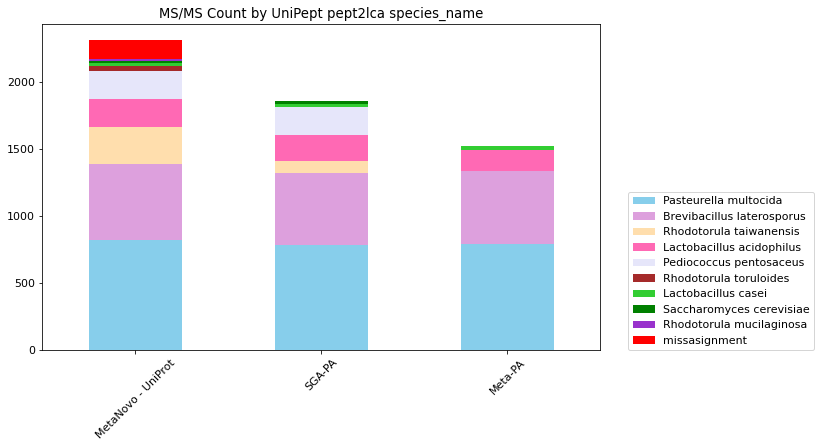

                            MetaNovo - UniProt  SGA-PA  Meta-PA
species_name                                                   
Brevibacillus laterosporus                 570     536      539
Lactobacillus acidophilus                  212     196      158
Lactobacillus casei                         28      26       27
Pasteurella multocida                      820     787      795
Pediococcus pentosaceus                    209     209        0
Rhodotorula spp                            315      85        0
Saccharomyces cerevisiae                    14      15        0
missasignment                              148       0        0
                            MetaNovo - UniProt     SGA-PA    Meta-PA  \
species_name                                                           
Enterococcus faecalis                 0.000000   0.000000   0.000000   
Escherichia coli                      0.000000   0.000000   0.000000   
Pasteurella multocida                35.405872  42.448759  52.337064   


In [39]:
species_corrected_results = {}
order = ['MetaNovo - UniProt','SGA-PA', 'Meta-PA']

species_mse_allowed_corrected = species_mse_allowed + ['Rhodotorula taiwanensis', 'Rhodotorula toruloides', 'Rhodotorula mucilaginosa']

count_df = metanovo_functions.plot_taxa(results, 'species_name', smapping, order, 0.5, truth_list=species_mse_allowed_corrected, level='msms')
count_df = count_df.reset_index()

def fix_rhodotorula(val):
    if val.startswith('Rhodotorula'):
        return "Rhodotorula spp"
    else:
        return val

count_df['species_name' ] = count_df['species_name'].apply(fix_rhodotorula) # relabel all Rhodoturula as Rhodotorula spp

count_df = count_df.groupby(
   ['species_name']
).agg(
    {
         'MetaNovo - UniProt':sum,    # Sum duration per group
         'SGA-PA': sum,  # get the count of networks
         'Meta-PA': sum  # get the first date per group
    }
)
print(count_df)
mse_genus_df = count_df.copy()

mse_genus_df.loc["Enterococcus faecalis",'expected'] = 1
mse_genus_df.loc["Escherichia coli",'expected'] = 1
mse_genus_df.loc["Rhodotorula spp","expected"] = 1
mse_genus_df['expected'] = 1
mse_genus_df.loc["missasignment","expected"] = 0


species_mse_allowed_corrected = [i for i in species_mse_allowed_corrected if not i.startswith("Rhodotorula")] + ['Rhodotorula spp']

mse_genus_df =mse_genus_df.replace(np.nan,0)

r =mse_genus_df.loc[species_mse_allowed_corrected]/mse_genus_df.sum() * 100

print(r)

from sklearn.metrics import mean_squared_error
expected = r['expected']
cols = ['MetaNovo - UniProt','SGA-PA','Meta-PA']
for col in cols:
    pred = r[col]
    res = mean_squared_error(expected, pred)
    species_corrected_results[col] = res
    print(col, res)

In [40]:
res = pd.DataFrame([family_results,genus_results, species_results,species_corrected_results])
res.index = ['Family','Genus','Species', 'Species (relabelled)']
res = res[['Meta-PA','SGA-PA','MetaNovo - UniProt']]
res.round(2)

,Meta-PA,SGA-PA,MetaNovo - UniProt
Family,398.89,143.58,106.08
Genus,261.64,78.44,87.32
Species,333.17,207.77,151.05
Species (relabelled),333.17,198.79,138.03


# fig 5

In [41]:
metanovo_functions.concat_4way_image('analysis/figures/fig_5a.png',
                                     'analysis/figures/fig_5b.png',
                                     'analysis/figures/fig_5c.png',
                                     'analysis/figures/fig_5d.png',
                                     'analysis/figures/fig_5_combined.png' )